# Airline Passenger Satisfaction Prediction

### Import essential libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load both of the datasets 

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df.shape

(103904, 25)

In [6]:
test_df.shape

#so data is distributed 80/20

(25976, 25)

In [7]:
#load basic info of the data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
print(f"Number of rows in training data: {train_df.shape[0]}")
print(f"Number of rows in test data: {test_df.shape[0]}")

Number of rows in training data: 103904
Number of rows in test data: 25976


In [10]:
# Set Pandas to display all columns
pd.set_option('display.max_columns', None)

train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# Data Exploration

In [11]:
#split columns to categorical and numerical to help in viewing

categoricalcols_temp = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
train_df[categoricalcols_temp] = train_df[categoricalcols_temp].astype(object)

In [12]:
cat_columns = train_df.select_dtypes(object).columns.to_list()
print(cat_columns)
print()
num_columns = train_df.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [13]:
sample_data = train_df.sample(1000)

C:\Users\iymet\AppData\Local\Temp\ipykernel_1404\1984678537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax= ax[1], palette= 'crest')
C:\Users\iymet\AppData\Local\Temp\ipykernel_1404\1984678537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax= ax[1], palette= 'crest')
C:\Users\iymet\AppData\Local\Temp\ipykernel_1404\1984678537.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax= ax[1], palette= 'crest')
C:\Users\iymet\AppData\Local\Temp\ipykernel_1404\198467853

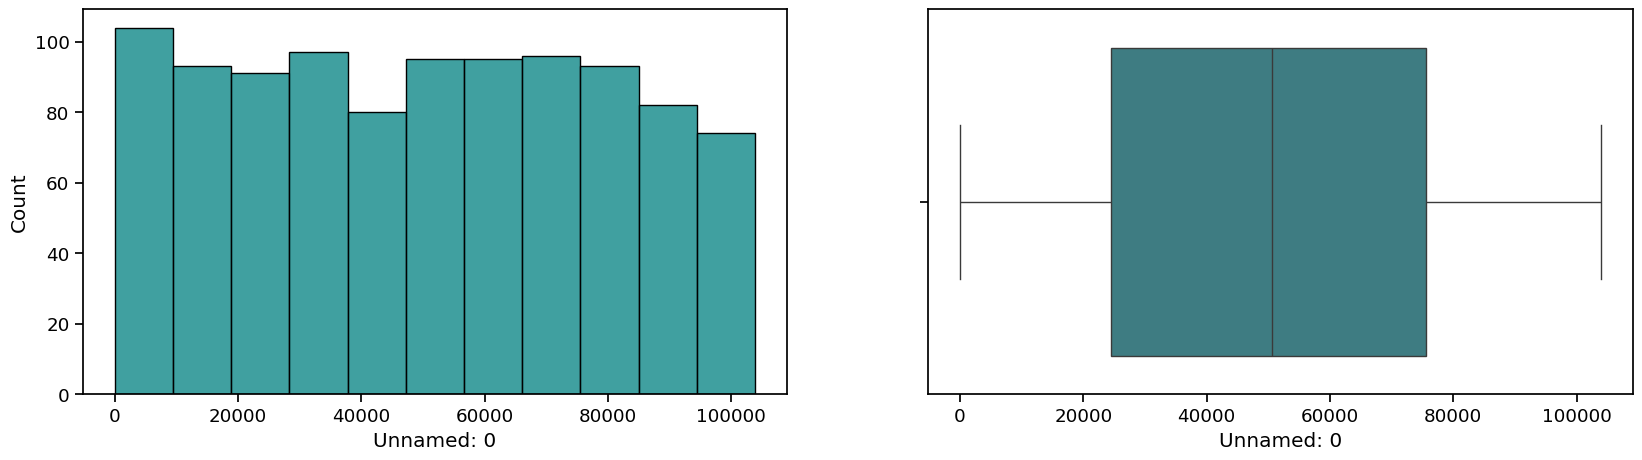

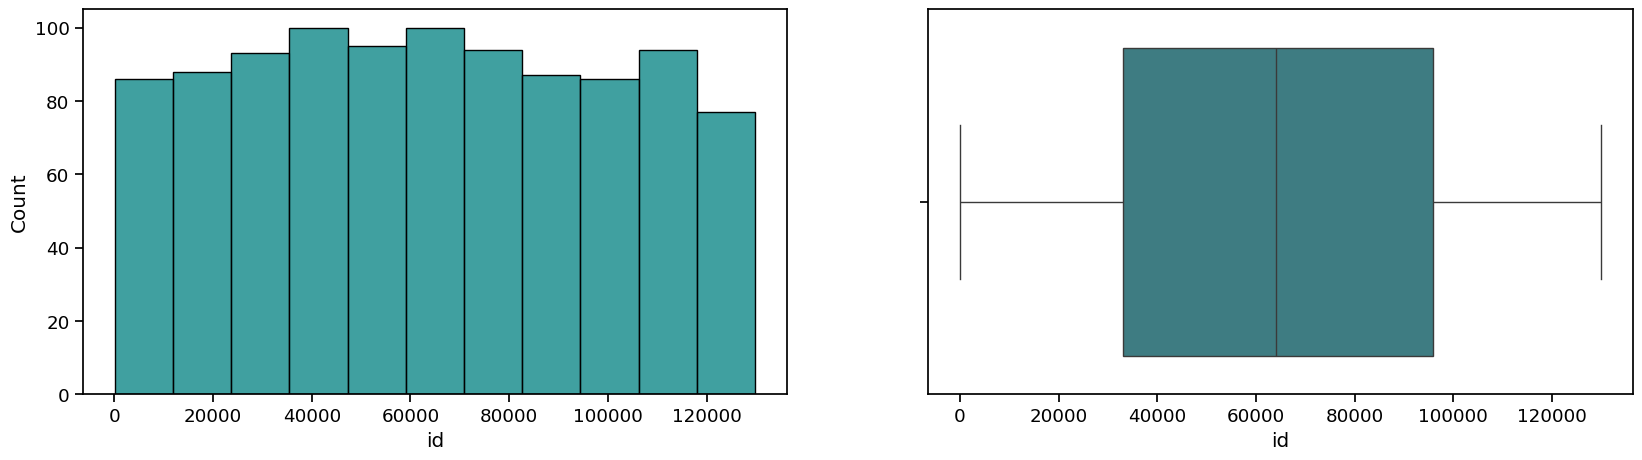

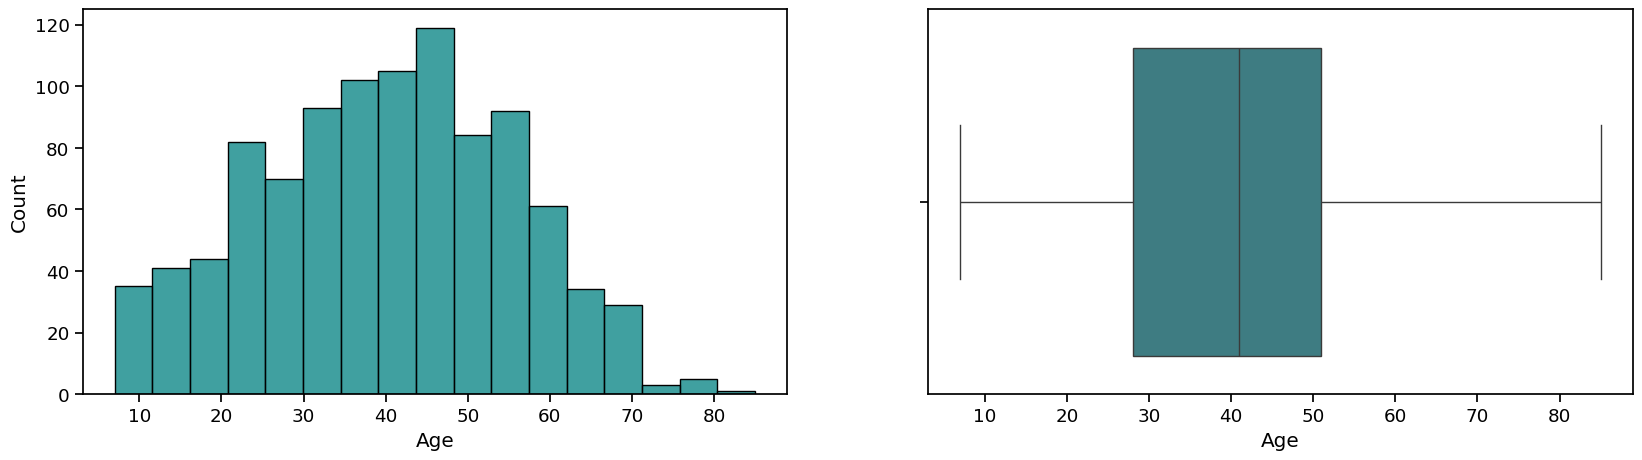

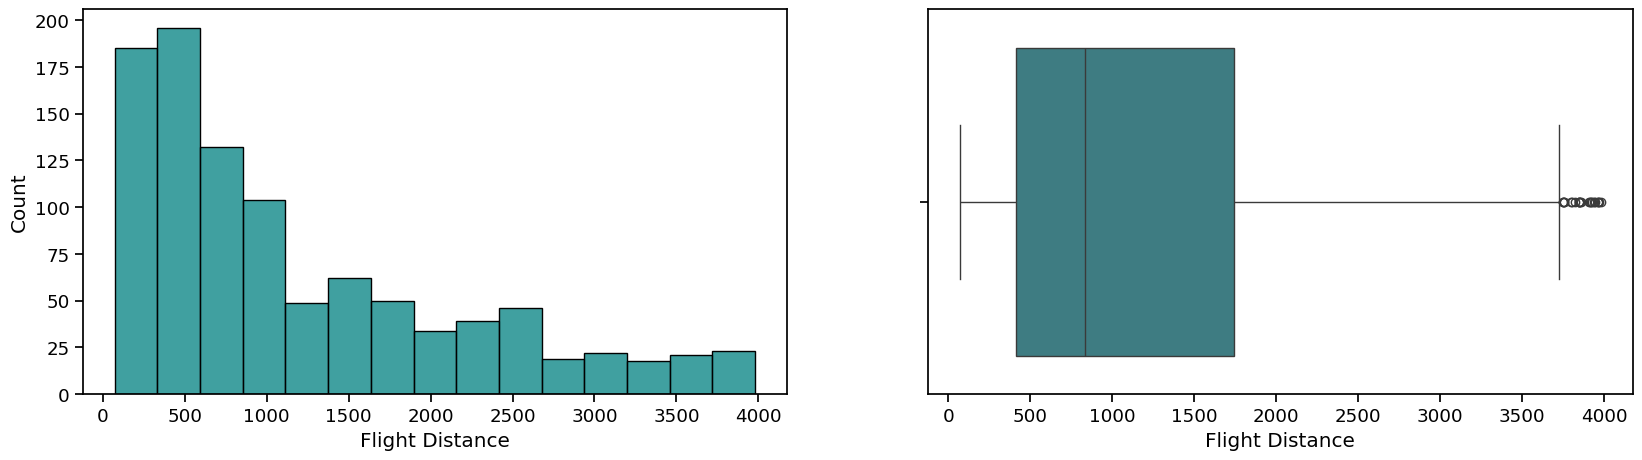

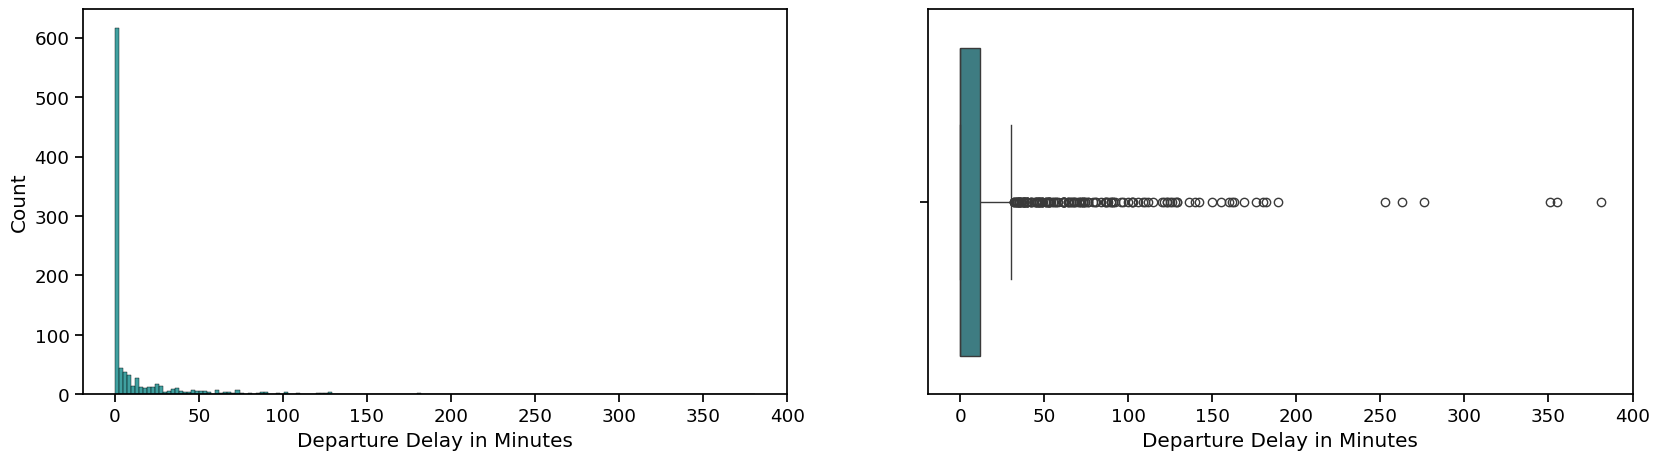

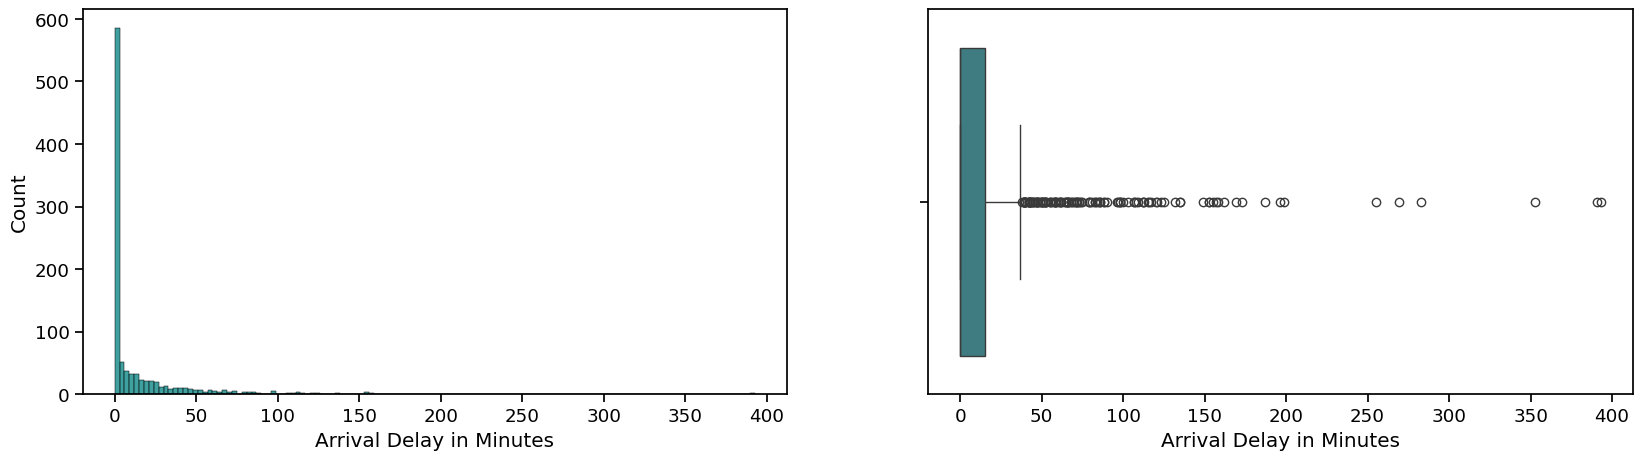

In [14]:
sns.set_context('notebook', font_scale= 1.2)
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(sample_data[col], ax = ax[0], color= 'teal')
    sns.boxplot(x = sample_data[col], ax= ax[1], palette= 'crest')

#### Majority of the flights have no delay, therefore both the Departure delay and arrival delay distributions are heavily skewed.

C:\Users\iymet\AppData\Local\Temp\ipykernel_1404\623377483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = sample_data, palette= 'winter', ax = axes[0, 0]);
C:\Users\iymet\AppData\Local\Temp\ipykernel_1404\623377483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Customer Type', data = sample_data, palette= 'winter', ax = axes[0, 1]);
C:\Users\iymet\AppData\Local\Temp\ipykernel_1404\623377483.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Type of Travel', data = sample_data, palette= 'winter'

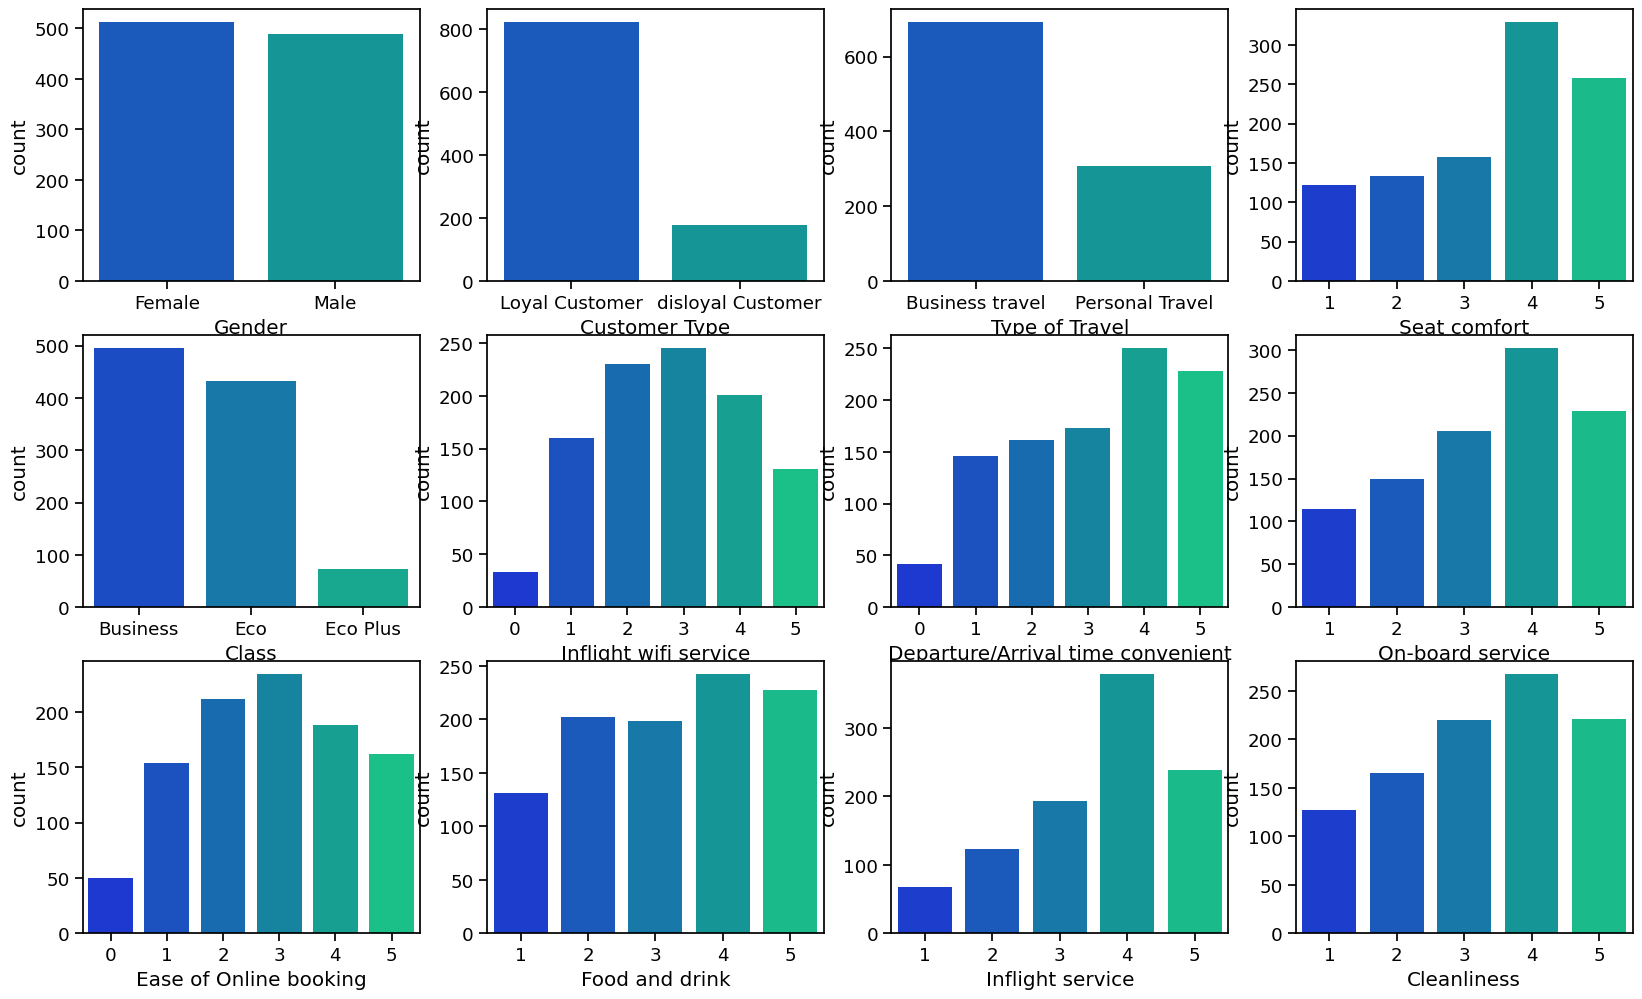

In [15]:
#view all categoircal Data 
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Gender', data = sample_data, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sample_data, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sample_data, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sample_data, palette= 'winter', ax = axes[0, 3]);
sns.countplot(x = 'Class', data = sample_data, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = sample_data, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sample_data, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = sample_data, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = sample_data, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = sample_data, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = sample_data, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = sample_data, palette= 'winter', ax = axes[2, 3]);

### Food and Drink facilities have almost equal number of 2, 3, 4 and 5 ratings.
### Wifi and Ease of Online Booking have recieved 2 out of 5 majority of the times

## Visualizing correlation between data

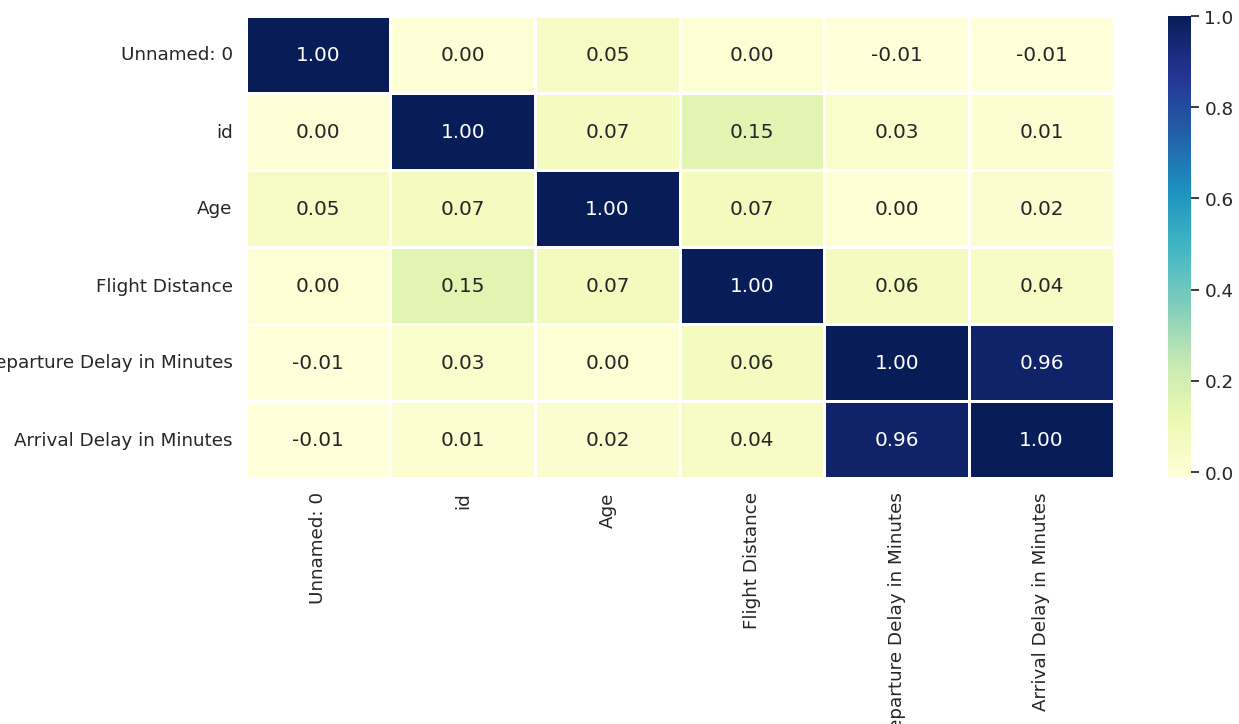

In [16]:
#Visualizing correlation between data
numeric_data = sample_data.select_dtypes(include=['number'])

with sns.axes_style('white'):
    plt.figure(figsize=(14, 6))
    sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', linewidths=0.8, cmap="YlGnBu")

### Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped

### visualizing the correlation between departure delay and arrival delay

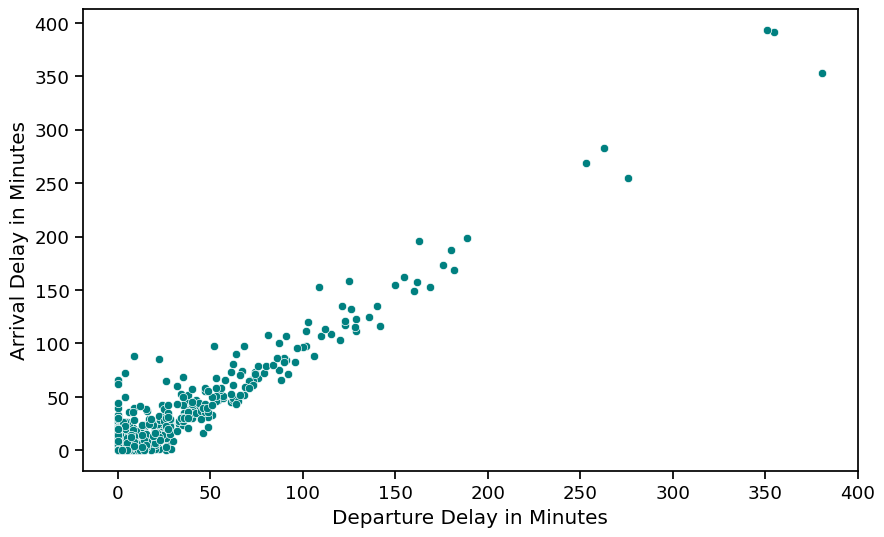

In [17]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = sample_data, color = 'teal')
plt.show()

# Data Preprocessing 

## Dropping unwanted features

In [18]:
#Dropping Departure Delay column

train_df.drop('Departure Delay in Minutes', axis=1, inplace= True)
test_df.drop('Departure Delay in Minutes', axis=1, inplace= True)

In [19]:
#Dropping Id and Unnamed column because they dont't affect satisfaction

train_df.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test_df.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

In [20]:
#Check departure culumn is dropped
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,satisfied


In [21]:
test_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,20.0,satisfied


## Handling Outliers

In [22]:
## Z-score or IQR or graphical meathod (Box Plot)

In [23]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,satisfied


In [24]:
#importing Z score
from scipy.stats import zscore

In [25]:
# Compute Z-scores
z_scores = zscore(train_df[['Age', 'Flight Distance', 'Arrival Delay in Minutes']])
threshold = 3
outliers = (np.abs(z_scores) > threshold)

# See how many outliers per column
print(outliers.sum(axis=0))

Age                         17
Flight Distance             58
Arrival Delay in Minutes     0
dtype: int64


##### Removing outliers from trainset 

In [26]:
rows_to_keep = ~(outliers.any(axis=1))

# Step 4: Filter the DataFrame to remove outliers
train_df = train_df[rows_to_keep].reset_index(drop=True)

In [27]:
# Compute Z-scores After removal
z_scores = zscore(train_df[['Age', 'Flight Distance', 'Arrival Delay in Minutes']])
threshold = 3
outliers = (np.abs(z_scores) > threshold)

# See how many outliers per column
print(outliers.sum(axis=0))

Age                         0
Flight Distance             0
Arrival Delay in Minutes    0
dtype: int64


In [28]:
z_scores = zscore(test_df[['Age', 'Flight Distance', 'Arrival Delay in Minutes']])
threshold = 3
outliers = (np.abs(z_scores) > threshold)

# See how many outliers per column
print(outliers.sum(axis=0))

Age                          0
Flight Distance             20
Arrival Delay in Minutes     0
dtype: int64


##### Removing outliers from test 

In [29]:
#Removing outliers in test

rows_to_keep = ~(outliers.any(axis=1))

# Step 4: Filter the DataFrame to remove outliers
test_df = test_df[rows_to_keep].reset_index(drop=True)

In [30]:
# Compute Z-scores After removal
z_scores = zscore(test_df[['Age', 'Flight Distance', 'Arrival Delay in Minutes']])
threshold = 3
outliers = (np.abs(z_scores) > threshold)

# See how many outliers per column
print(outliers.sum(axis=0))

Age                         0
Flight Distance             0
Arrival Delay in Minutes    0
dtype: int64


## Handling missing values

In [31]:
train_df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [32]:
test_df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [33]:
median_val = train_df['Arrival Delay in Minutes'].median()

# Filling missing values with median as distribution of arrival delay was heavily skewed & its affected by outliers
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].fillna(median_val)
test_df['Arrival Delay in Minutes'] = test_df['Arrival Delay in Minutes'].fillna(median_val)

In [34]:
#checking if the null values got replaced or not

train_df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [35]:
test_df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [36]:
train_df[cat_columns].nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

#### Some of the missing values in categorical columns are represented by 0, lets replace them with mode of that particular column

In [37]:
#Replace categorical values with the mode

columns_containing_0 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']
modes = train_df[columns_containing_0].mode()
train_df[columns_containing_0] = train_df[columns_containing_0].replace({'0': modes})
test_df[columns_containing_0] = test_df[columns_containing_0].replace({'0': modes})

###### BONUS PART

In [38]:
#Lot of features were skewed, therefore it will be appropriate to apply log transformation to them
train_df['Flight Distance'] = np.log1p(train_df['Flight Distance'])
test_df['Flight Distance'] = np.log1p(test_df['Flight Distance'])
test_df['Arrival Delay in Minutes'] = np.log1p(test_df['Arrival Delay in Minutes'])

#### Create one new feature that sums all of the rating features in one 

In [39]:
# # Create a new feature (sum of all service ratings)
# service_rating_cols = [
#     'Inflight wifi service',
#     'Departure/Arrival time convenient',
#     'Ease of Online booking',
#     'Gate location',
#     'Food and drink',
#     'Online boarding',
#     'Seat comfort',
#     'Inflight entertainment',
#     'On-board service',
#     'Leg room service',
#     'Baggage handling',
#     'Checkin service',
#     'Inflight service',
#     'Cleanliness'
# ]

# train_df['Total_Service_Score'] = train_df[service_rating_cols].sum(axis=1)
# test_df['Total_Service_Score'] = test_df[service_rating_cols].sum(axis=1)

In [40]:
# #dropping the columns we summed it 

# train_df.drop(columns=service_rating_cols, inplace=True)
# test_df.drop(columns=service_rating_cols, inplace=True)

In [41]:
# #reoder the Data
# desired_order = [
#     'Gender',
#     'Customer Type',
#     'Age',
#     'Type of Travel',
#     'Class',
#     'Flight Distance',
#     'Total_Service_Score',
#     'Arrival Delay in Minutes',
#     'satisfaction'
# ]

# train_df = train_df[desired_order]
# test_df = test_df[desired_order]

In [42]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,6.133398,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,5.463832,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,7.041412,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,6.333280,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,5.370638,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,satisfied


### Label Encoding 

In [43]:
# Label encoding the categorical features

train_df['Gender'] = train_df['Gender'].map({'Male' : 0, 'Female' : 1})
train_df['Customer Type'] = train_df['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
train_df['Type of Travel'] = train_df['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
train_df['Class'] = train_df['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


test_df['Gender'] = test_df['Gender'].map({'Male' : 0, 'Female' : 1})
test_df['Customer Type'] = test_df['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
test_df['Type of Travel'] = test_df['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
test_df['Class'] = test_df['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

In [44]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,1,6.133398,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,0
1,0,1,25,1,2,5.463832,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,1,0,26,1,2,7.041412,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,1,0,25,1,2,6.333280,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,0,0,61,1,2,5.370638,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


### splitting Data

In [45]:
X_train = train_df.drop('satisfaction', axis = 1)
y_train = train_df.satisfaction

X_test = test_df.drop('satisfaction', axis=1)
y_test = test_df.satisfaction

### Feature Scalling 

In [46]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

# K Nearest Neighbor 

In [47]:
# importing model & accuracy measures 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

In [48]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.926


In [49]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.926


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14564
           1       0.94      0.89      0.91     11392

    accuracy                           0.93     25956
   macro avg       0.93      0.92      0.92     25956
weighted avg       0.93      0.93      0.93     25956



## Choosing a K value

In [51]:
accuracy = []
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

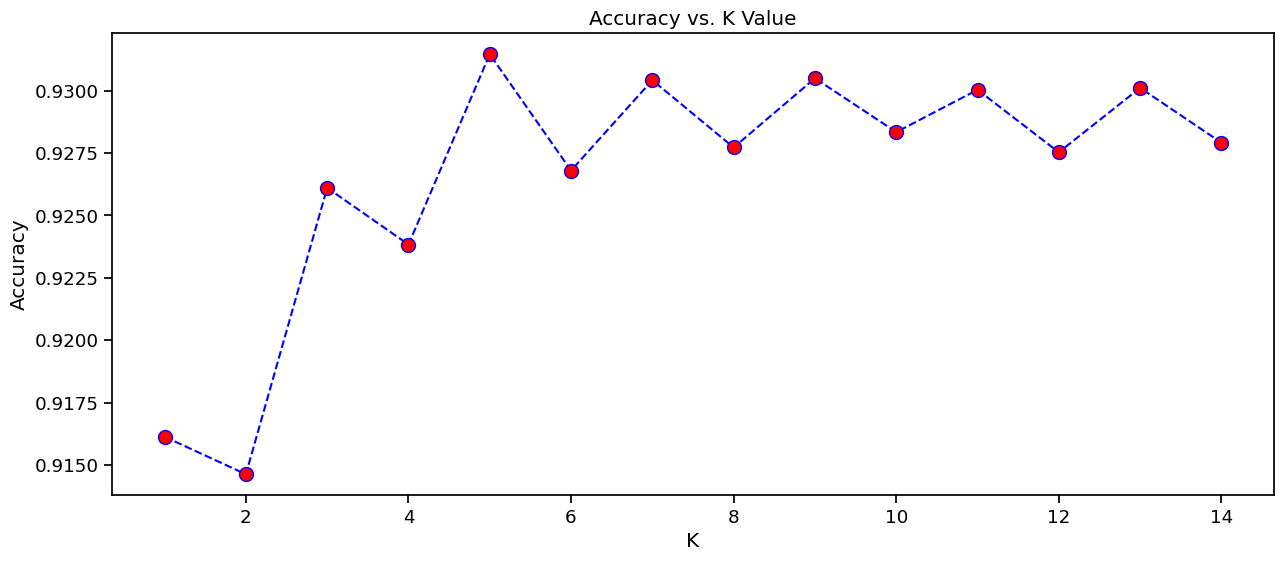

In [52]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

### Evaluating K Nearest Neighbor

In [ ]:
# Importing accuracy score and Confusion matrix

from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 93.15%


In [56]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     14564
           1       0.95      0.89      0.92     11392

    accuracy                           0.93     25956
   macro avg       0.93      0.93      0.93     25956
weighted avg       0.93      0.93      0.93     25956



## Display the Confusion matrix

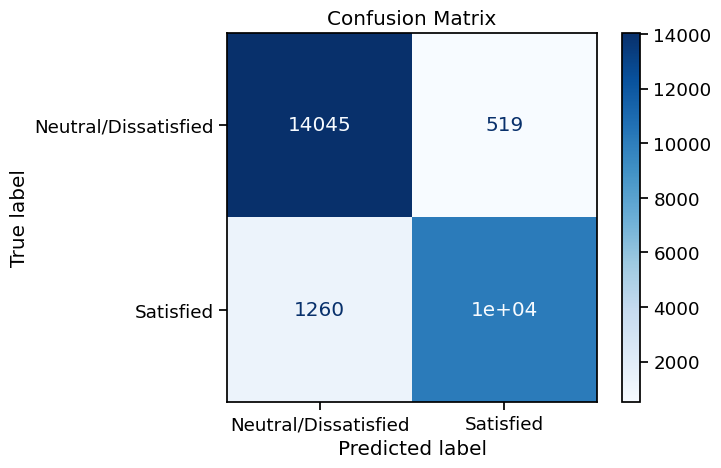

In [57]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Neutral/Dissatisfied", "Satisfied"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Check for overfitting

In [58]:
#Comparing Trainn and test accuracies 


# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Train Accuracy: 0.949
Test Accuracy: 0.931


### Very similar therefore there's no overfitting

In [59]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

Cross-Validation Accuracy Scores: [0.92526245 0.92776654 0.92718867 0.92829625 0.93166386]
Mean CV Accuracy: 0.9280355548864245


#### Performs very consistently across different parts of the data therefore there's no overfitting

# Logistic Regression

In [60]:
# Import Logistic Regression function
from sklearn.linear_model import LogisticRegression

In [61]:
# create and fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [62]:
#Test the Predictions
y_pred = log_reg.predict(X_test)

In [63]:
#Accuracy on test set
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(test_acc, 3))

Test Accuracy: 0.87


In [64]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     14564
           1       0.86      0.84      0.85     11392

    accuracy                           0.87     25956
   macro avg       0.87      0.87      0.87     25956
weighted avg       0.87      0.87      0.87     25956



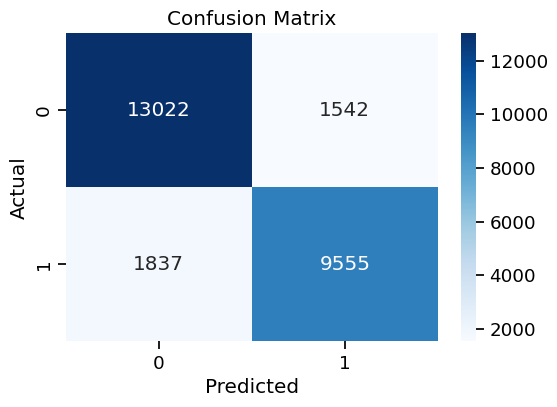

In [65]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Testing for overfitting

In [66]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

Cross-Validation Accuracy Scores: [0.87388038 0.87368776 0.8727728  0.87397669 0.87931616]
Mean CV Accuracy: 0.8747267583179908


In [67]:
#Comparing Trainn and test accuracies 

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Train Accuracy: 0.875
Test Accuracy: 0.870


# SVM Model

In [68]:
# import the library 
from sklearn.svm import SVC

In [ ]:
#Create and fit the model
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

In [ ]:
#Test the Predictions
y_pred = svm_model.predict(X_test)

In [ ]:
#Accuracy on test set
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(test_acc, 3))

In [ ]:
#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Test For overfitting

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

In [ ]:
#Comparing Trainn and test accuracies 

# Predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

# Random Forest

In [ ]:
# import the libary 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 1. Create and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# 2. Test the Predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# 3. Accuracy on test set
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(test_acc, 3))

In [ ]:
# 4. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Test for Overfitting

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

In [ ]:
#Comparing Trainn and test accuracies 

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")